In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/sanitized_input.csv')
df.head()

,Survived,male,female,first_class,second_class,third_class,S,C,Q,norm_age,norm_sib_sp,norm_fare,norm_parch
0,0,1,0,0,0,1,1,0,0,0.304501,0.787623,0.071027,0.0
1,1,0,1,1,0,0,0,1,0,0.746132,0.787623,0.870605,0.0
2,1,0,1,0,0,1,1,0,0,0.434599,0.000000,0.213080,0.0
3,1,0,1,1,0,0,1,0,0,0.684951,0.787623,0.828411,0.0
4,0,1,0,0,0,1,1,0,0,0.684951,0.000000,0.246835,0.0


In [3]:
df.columns

Index(['Survived', 'male', 'female', 'first_class', 'second_class',
       'third_class', 'S', 'C', 'Q', 'norm_age', 'norm_sib_sp', 'norm_fare',
       'norm_parch'],
      dtype='object')

In [4]:
y = df["Survived"].values
x = df.drop(["Survived", "S", "norm_fare", "male", "third_class"], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

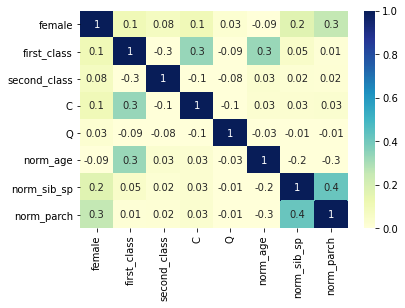

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x.corr(), cmap="YlGnBu", annot=True, fmt='.1g', vmin=0)

In [7]:
import statsmodels.api as sm

In [8]:
x_sm = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_sm)
logit_res = logit_model.fit_regularized()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4428497913556105
            Iterations: 56
            Function evaluations: 56
            Gradient evaluations: 56


In [9]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      560
Method:                           MLE   Df Model:                            8
Date:                Wed, 17 Jun 2020   Pseudo R-squ.:                  0.3401
Time:                        23:35:31   Log-Likelihood:                -251.98
converged:                       True   LL-Null:                       -381.86
Covariance Type:            nonrobust   LLR p-value:                 1.462e-51
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.9035      0.307     -6.210      0.000      -2.504      -1.303
female           2.6775      0.250     10.705      0.000       2.187       3.168
first_class      2.5131      0.339      7.421      0.000       1.849       3.177
second_class     1.3115      0.283      4.631      0.000       0.756       1.867
C                0.2826      0.309      0.913      0.361      -0.324       0.889
Q               -0.2738      0.662     -0.413      0.679      -1.572       1.024
norm_age        -1.2630      0.464     -2.719      0.007      -2.173      -0.353
norm_sib_sp     -0.2284      0.313     -0.730      0.466      -0.842       0.385
norm_parch       0.0351      0.336      0.105      0.917      -0.623       0.693
================================================================================
"""

In [10]:
from sklearn.metrics import classification_report

In [11]:
x_test_sm = sm.add_constant(x_test)
y_test_pred_sm = logit_res.predict(x_test_sm).round().values
report = classification_report(y_test, y_test_pred_sm)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.84      0.67      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.80      0.80      0.79       143



In [12]:
y_train_pred_sm = logit_res.predict(x_sm).round().values
report = classification_report(y_train, y_train_pred_sm)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       344
           1       0.76      0.72      0.74       225

    accuracy                           0.80       569
   macro avg       0.79      0.79      0.79       569
weighted avg       0.80      0.80      0.80       569



In [13]:
import sklearn.linear_model as lm

In [14]:
lr_model = lm.LogisticRegression()
lr_model.fit(x_train, y_train)
y_test_pred_lr = lr_model.predict(x_test)
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.84      0.65      0.73        63

    accuracy                           0.79       143
   macro avg       0.80      0.78      0.78       143
weighted avg       0.80      0.79      0.79       143



In [15]:
y_train_pred_lr = lr_model.predict(x_train)
print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       344
           1       0.76      0.71      0.73       225

    accuracy                           0.80       569
   macro avg       0.79      0.78      0.78       569
weighted avg       0.79      0.80      0.79       569



In [16]:
import sklearn.preprocessing as sk_pre

In [17]:
x_train_lr_h = sk_pre.PolynomialFeatures(2).fit_transform(x_train)
x_test_lr_h = sk_pre.PolynomialFeatures(2).fit_transform(x_test)

In [18]:
lr_model_h = lm.LogisticRegression(fit_intercept=False)
lr_model_h.fit(x_train_lr_h, y_train)

LogisticRegression(fit_intercept=False)

In [19]:
y_test_pred_lr_h = lr_model_h.predict(x_test_lr_h)
print(classification_report(y_test, y_test_pred_lr_h))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



In [20]:
y_train_pred_lr_h = lr_model_h.predict(x_train_lr_h)
print(classification_report(y_train, y_train_pred_lr_h))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       344
           1       0.82      0.68      0.74       225

    accuracy                           0.81       569
   macro avg       0.81      0.79      0.80       569
weighted avg       0.81      0.81      0.81       569



In [21]:
lrc_model = lm.LogisticRegressionCV()
lrc_model.fit(x_train, y_train) 

LogisticRegressionCV()

In [22]:
y_test_pred_lrc = lrc_model.predict(x_test)
print(classification_report(y_test, y_test_pred_lrc))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.84      0.67      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.80      0.80      0.79       143



In [23]:
y_train_pred_lrc = lrc_model.predict(x_train)
print(classification_report(y_train, y_train_pred_lrc))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       344
           1       0.76      0.72      0.74       225

    accuracy                           0.80       569
   macro avg       0.79      0.79      0.79       569
weighted avg       0.80      0.80      0.80       569



In [24]:
import sklearn.ensemble as sk_ens

In [25]:
rfc_model = sk_ens.RandomForestClassifier(max_depth=3, n_jobs=2)
rfc_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=2)

In [26]:
y_test_pred_rfc = rfc_model.predict(x_test)
print(classification_report(y_test, y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        80
           1       0.83      0.60      0.70        63

    accuracy                           0.77       143
   macro avg       0.78      0.75      0.76       143
weighted avg       0.78      0.77      0.76       143



In [27]:
y_train_pred_rfc = rfc_model.predict(x_train)
print(classification_report(y_train, y_train_pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       344
           1       0.87      0.64      0.73       225

    accuracy                           0.82       569
   macro avg       0.83      0.79      0.80       569
weighted avg       0.82      0.82      0.81       569



In [28]:
rfc_model_h = sk_ens.RandomForestClassifier(max_depth=3, n_jobs=2)
rfc_model_h.fit(x_train_lr_h, y_train)

RandomForestClassifier(max_depth=3, n_jobs=2)

In [29]:
y_test_pred_rfc_h = rfc_model_h.predict(x_test_lr_h)
print(classification_report(y_test, y_test_pred_rfc_h))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        80
           1       0.80      0.62      0.70        63

    accuracy                           0.76       143
   macro avg       0.77      0.75      0.75       143
weighted avg       0.77      0.76      0.76       143



In [30]:
y_train_pred_rfc_h = rfc_model_h.predict(x_train_lr_h)
print(classification_report(y_train, y_train_pred_rfc_h))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       344
           1       0.80      0.68      0.74       225

    accuracy                           0.81       569
   macro avg       0.80      0.79      0.79       569
weighted avg       0.81      0.81      0.80       569



In [31]:
from sklearn.model_selection import learning_curve
train_sizes = {}
train_scores = {}
test_scores = {}

In [32]:
train_sizes["lr"], train_scores["lr"], test_scores["lr"] = learning_curve(lr_model, x, y, n_jobs=2)
train_scores["lr"] = np.mean(train_scores["lr"], axis=1)
test_scores["lr"] = np.mean(test_scores["lr"], axis=1)

In [33]:
train_sizes["lr_h"], train_scores["lr_h"], test_scores["lr_h"] = learning_curve(lr_model_h, x, y, n_jobs=2)
train_scores["lr_h"] = np.mean(train_scores["lr_h"], axis=1)
test_scores["lr_h"] = np.mean(test_scores["lr_h"], axis=1)

In [34]:
train_sizes["lrc"], train_scores["lrc"], test_scores["lrc"] = learning_curve(lrc_model, x, y, n_jobs=2)
train_scores["lrc"] = np.mean(train_scores["lrc"], axis=1)
test_scores["lrc"] = np.mean(test_scores["lrc"], axis=1)

In [35]:
train_sizes["rfc"], train_scores["rfc"], test_scores["rfc"] = learning_curve(rfc_model, x, y, n_jobs=2)
train_scores["rfc"] = np.mean(train_scores["rfc"], axis=1)
test_scores["rfc"] = np.mean(test_scores["rfc"], axis=1)

In [36]:
train_sizes["rfc_h"], train_scores["rfc_h"], test_scores["rfc_h"] = learning_curve(rfc_model_h, sk_pre.PolynomialFeatures(2).fit_transform(x), y, n_jobs=2)
train_scores["rfc_h"] = np.mean(train_scores["rfc_h"], axis=1)
test_scores["rfc_h"] = np.mean(test_scores["rfc_h"], axis=1)

lr


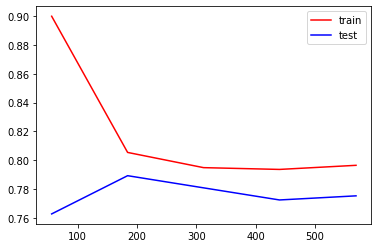


lr_h


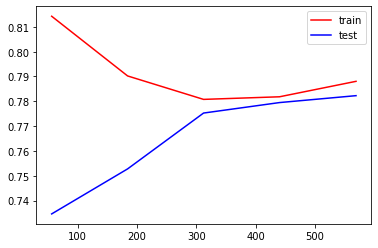


lrc


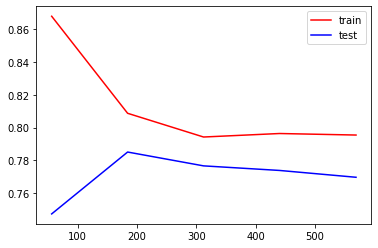


rfc


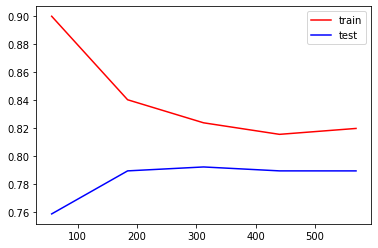


rfc_h


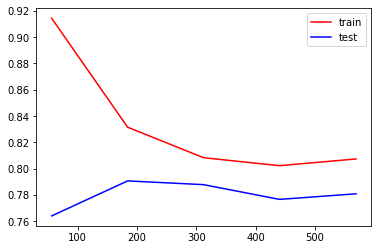

In [37]:
for key in train_sizes:
    print(key)
    plt.plot(train_sizes[key], train_scores[key], "r", label="train")
    plt.plot(train_sizes[key], test_scores[key], "b", label="test")
    plt.legend()
    plt.show()
    print()

In [38]:
accuracies = {
    "lr": {"train": np.mean(y_train == y_train_pred_lr).round(3), "test": np.mean(y_test == y_test_pred_lr).round(3)},
    "lr_h": {"train": np.mean(y_train == y_train_pred_lr_h).round(3), "test": np.mean(y_test == y_test_pred_lr_h).round(3)},
    "lrc": {"train": np.mean(y_train == y_train_pred_lrc).round(3), "test": np.mean(y_test == y_test_pred_lrc).round(3)},
    "rfc": {"train": np.mean(y_train == y_train_pred_rfc).round(3), "test": np.mean(y_test == y_test_pred_rfc).round(3)},
    "rfc_h": {"train": np.mean(y_train == y_train_pred_rfc_h).round(3), "test": np.mean(y_test == y_test_pred_rfc_h).round(3)}
}

In [39]:
for key in accuracies:
    accuracies[key]["all"] = np.mean([accuracies[key]["train"], accuracies[key]["test"]]).round(3)
    print(key)
    print(accuracies[key])

lr
{'train': 0.796, 'test': 0.79, 'all': 0.793}
lr_h
{'train': 0.814, 'test': 0.797, 'all': 0.806}
lrc
{'train': 0.8, 'test': 0.797, 'all': 0.798}
rfc
{'train': 0.817, 'test': 0.769, 'all': 0.793}
rfc_h
{'train': 0.807, 'test': 0.762, 'all': 0.784}


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
gsc_model = GridSearchCV(lr_model_h, {"C": np.linspace(0.01, 1, 30)})
gsc_model.fit(x_train_lr_h, y_train)
gsc_model.best_score_, gsc_model.best_params_

(0.7926564198105883, {'C': 0.7610344827586207})

In [42]:
y_test_pred_gsc = gsc_model.predict(x_test_lr_h)
print(classification_report(y_test, y_test_pred_gsc))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



In [43]:
y_train_pred_gsc = gsc_model.predict(x_train_lr_h)
print(classification_report(y_train, y_train_pred_gsc))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       344
           1       0.82      0.68      0.74       225

    accuracy                           0.81       569
   macro avg       0.81      0.79      0.80       569
weighted avg       0.81      0.81      0.81       569



In [44]:
gsc_rf_model = GridSearchCV(rfc_model, {'max_depth': range(1,7)})
gsc_rf_model.fit(x_train, y_train)
gsc_rf_model.best_score_, gsc_rf_model.best_params_

(0.8102002794597112, {'max_depth': 6})

In [45]:
y_test_pred_gsc_rf = gsc_rf_model.predict(x_test)
print(classification_report(y_test, y_test_pred_gsc_rf))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        80
           1       0.84      0.73      0.78        63

    accuracy                           0.82       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



In [46]:
y_train_pred_gsc_rf = gsc_rf_model.predict(x_train)
print(classification_report(y_train, y_train_pred_gsc_rf))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       344
           1       0.89      0.75      0.81       225

    accuracy                           0.86       569
   macro avg       0.87      0.84      0.85       569
weighted avg       0.87      0.86      0.86       569



In [47]:
from sklearn.kernel_approximation import RBFSampler

In [48]:
all_results = []
for gamma in np.linspace(0.1, 1, 50):
    rbf_sampler = RBFSampler(gamma=gamma)
    t_model = lm.LogisticRegression(C=0.08, n_jobs=2)
    t_model.fit(rbf_sampler.fit_transform(x_train), y_train)
    all_results.append({"gamma": gamma, "test": t_model.score(rbf_sampler.transform(x_test), y_test), "train": t_model.score(rbf_sampler.transform(x_train), y_train)})

In [49]:
ar_df = pd.DataFrame(all_results)

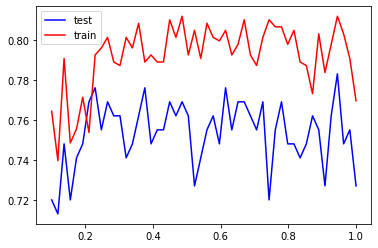

In [50]:
plt.plot(ar_df["gamma"], ar_df["test"], "b", label="test")
plt.plot(ar_df["gamma"], ar_df["train"], "r", label="train")
plt.legend()
plt.show()

In [51]:
ar_df.max()

gamma    1.000000
test     0.783217
train    0.811951
dtype: float64

In [52]:
ar_df.idxmax()

gamma    49
test     46
train    21
dtype: int64

In [53]:
ar_df.iloc[13], ar_df.iloc[29]

(gamma    0.338776
 test     0.748252
 train    0.796134
 Name: 13, dtype: float64,
 gamma    0.632653
 test     0.755245
 train    0.792619
 Name: 29, dtype: float64)

In [54]:
y_test_pred_t = t_model.predict(rbf_sampler.transform(x_test))
print(classification_report(y_test, y_test_pred_t))

              precision    recall  f1-score   support

           0       0.69      0.94      0.79        80
           1       0.85      0.46      0.60        63

    accuracy                           0.73       143
   macro avg       0.77      0.70      0.70       143
weighted avg       0.76      0.73      0.71       143



In [55]:
y_train_pred_t = t_model.predict(rbf_sampler.transform(x_train))
print(classification_report(y_train, y_train_pred_t))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83       344
           1       0.88      0.48      0.62       225

    accuracy                           0.77       569
   macro avg       0.81      0.72      0.73       569
weighted avg       0.79      0.77      0.75       569



In [56]:
import sklearn.neural_network as sk_nn

In [100]:
mlp_model = sk_nn.MLPClassifier(hidden_layer_sizes=(256, 512, 256), activation="relu", warm_start=True, max_iter=300)
mlp_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 512, 256), max_iter=300, warm_start=True)

In [104]:
y_test_pred_mlp = mlp_model.predict(x)
print(classification_report(y, y_test_pred_mlp))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       424
           1       0.83      0.78      0.81       288

    accuracy                           0.85       712
   macro avg       0.85      0.84      0.84       712
weighted avg       0.85      0.85      0.85       712

